# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("Classified Data",index_col=0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# Standardization of Variables

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(df.drop("TARGET CLASS",axis=1))

In [9]:
df_st = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [10]:
df_st.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_st, df["TARGET CLASS"], test_size=0.33, random_state=42)

# KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier()

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
pred = knn.predict(X_test)

# Evaluation

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(confusion_matrix(y_test,pred))

[[149   6]
 [ 10 165]]


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       155
           1       0.96      0.94      0.95       175

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



# Chosing the Best K Value

In [20]:
error_rates = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict = knn.predict(X_test)
    error_rates.append(np.mean(y_test!=predict))
    

Text(0, 0.5, 'error rate')

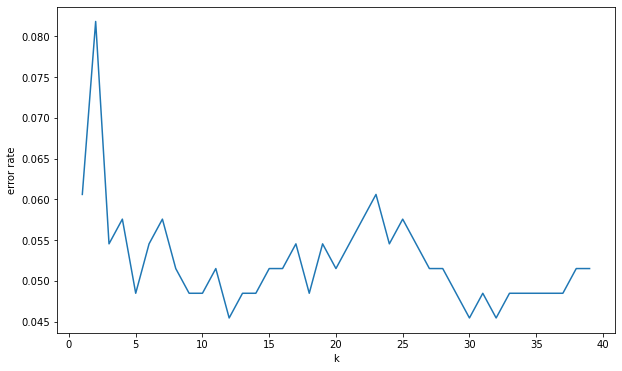

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rates)
plt.xlabel("k")
plt.ylabel("error rate")

# Retrain Data 
Best fit would be 30

In [22]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
predict = knn.predict(X_test)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[148   7]
 [  8 167]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       155
           1       0.96      0.95      0.96       175

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

